import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
housing = pd.read_csv("housing.csv")

# Preping Database

### Calculating distance to LA and SF

In [3]:
LA_latitude = 34.052235  # Latitude of Los Angeles
LA_longitude = -118.243683  # Longitude of Los Angeles
SF_latitude = 37.774925
SF_longitude = -122.419420

In [4]:
def calcDeg(x):
    return (x/180)*np.pi

In [5]:
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points 
    on the earth specified in radians.
    """
    # Radius of the Earth
    R = 6371.0  # Earth radius in kilometers
    
    # Convert latitude and longitude from degrees to radians
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)
    
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    
    return distance

### creating needed columns

In [6]:
housing["distance_LA"] = haversine(housing["latitude"], housing["longitude"], LA_latitude, LA_longitude)

In [7]:
housing["distance_SF"] = haversine(housing["latitude"], housing["longitude"], SF_latitude, SF_longitude)

In [8]:
housing["ratio_population_households"] = housing["population"]/housing["households"]

In [9]:
housing = housing[housing["ratio_population_households"]<=20]

In [10]:
housing["ratio_rooms_bedrooms"] = housing["total_rooms"]/housing["total_bedrooms"]

In [11]:
housing = housing.head(10000)

In [28]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,distance_LA,distance_SF,ratio_population_households,ratio_rooms_bedrooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,556.529158,20.329379,2.555556,6.821705
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,554.279850,19.908287,2.109842,6.418626
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,554.610717,17.835639,2.802260,7.721053
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,555.194266,17.064293,2.547945,5.421277
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,555.194266,17.064293,2.181467,5.810714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,-121.00,39.09,7.0,439.0,84.0,246.0,80.0,3.0781,162500.0,INLAND,611.780327,191.485974,3.075000,5.226190
10000,-121.08,39.02,13.0,1839.0,275.0,752.0,270.0,4.2031,209600.0,INLAND,607.649644,181.080643,2.785185,6.687273
10001,-121.07,39.05,10.0,1813.0,311.0,827.0,287.0,3.6087,182100.0,INLAND,610.292845,184.182930,2.881533,5.829582
10002,-121.07,39.04,9.0,2374.0,372.0,884.0,333.0,4.5042,206400.0,INLAND,609.287617,183.333626,2.654655,6.381720


In [29]:
housing.to_csv("prepared.csv",index=False)

# Histograms

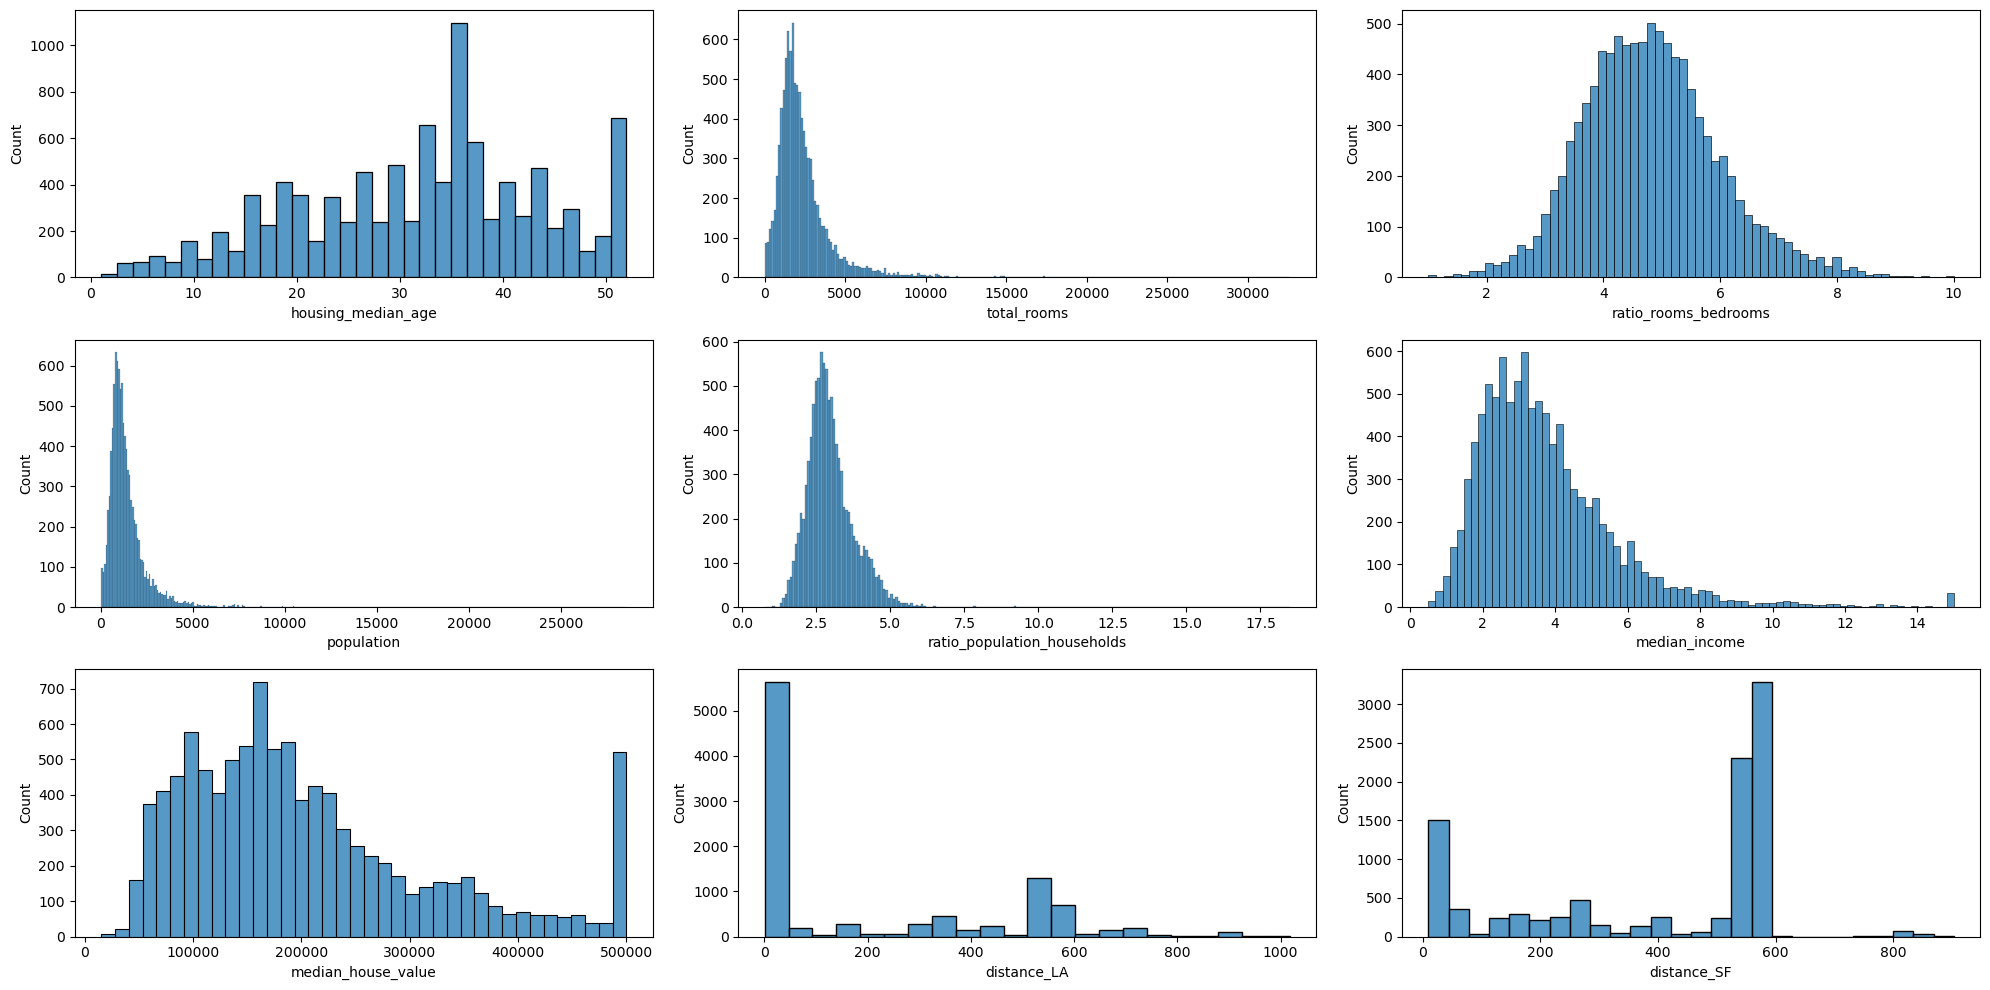

In [14]:
# age = sns.histplot(data = housing["housing_median_age"],ax=ax[0][0])
# rooms = sns.histplot(data = housing["total_rooms"],ax=ax[0][1])
# # bedrooms = sns.histplot(data = housing["total_bedrooms"])
# ratio_rooms_bedrooms = sns.histplot(data = housing["ratio_rooms_bedrooms"],ax=ax[0][2])
# population = sns.histplot(data = housing["population"],ax=ax[1][0])
# # households = sns.histplot(data = housing["households"])
# ratio_population_households = sns.histplot(data = housing["ratio_population_households"],ax=ax[1][1])
# median_income = sns.histplot(data = housing["median_income"],ax=ax[1][2])
# median_house_value = sns.histplot(data = housing["median_house_value"],ax=ax[2][0])
# distanceLA = sns.histplot(data = housing["distance_LA"],ax=ax[2][1])
# distanceSF = sns.histplot(data = housing["distance_SF"],ax=ax[2][2])
# # sns.histplot(data = housing["housing_median_age"])
fig = plt.figure(figsize=(20, 10))

plt.subplot(3, 3, 1)
sns.histplot(data=housing["housing_median_age"])
plt.subplot(3, 3, 2)
sns.histplot(data=housing["total_rooms"])
plt.subplot(3, 3, 3)
sns.histplot(data=housing["ratio_rooms_bedrooms"])
plt.subplot(3, 3, 4)
sns.histplot(data=housing["population"])
plt.subplot(3, 3, 5)

sns.histplot(data=housing["ratio_population_households"])
plt.subplot(3, 3, 6)

sns.histplot(data=housing["median_income"])
plt.subplot(3, 3, 7)

sns.histplot(data=housing["median_house_value"])
plt.subplot(3, 3, 8)

sns.histplot(data=housing["distance_LA"])
plt.subplot(3, 3, 9)

sns.histplot(data=housing["distance_SF"])

plt.tight_layout()
plt.savefig("plots.png")

plt.show()


# Min Max

In [15]:
print("housing_median_age min",housing["housing_median_age"].min()," max: ",housing["housing_median_age"].max())
print("total_rooms min",housing["total_rooms"].min()," max: ",housing["total_rooms"].max())
print("ratio_rooms_bedrooms min",housing["ratio_rooms_bedrooms"].min()," max: ",housing["ratio_rooms_bedrooms"].max())
print("population min",housing["population"].min()," max: ",housing["population"].max())
print("ratio_population_households min",housing["ratio_population_households"].min()," max: ",housing["ratio_population_households"].max())
print("median_income min",housing["median_income"].min()," max: ",housing["median_income"].max())
print("median_house_value min",housing["median_house_value"].min()," max: ",housing["median_house_value"].max())
print("distance_LA min",housing["distance_LA"].min()," max: ",housing["distance_LA"].max())
print("distance_SF min",housing["distance_SF"].min()," max: ",housing["distance_SF"].max())


housing_median_age min 1.0  max:  52.0
total_rooms min 2.0  max:  32627.0
ratio_rooms_bedrooms min 1.0  max:  10.0
population min 3.0  max:  28566.0
ratio_population_households min 0.75  max:  18.5
median_income min 0.4999  max:  15.0001
median_house_value min 14999.0  max:  500001.0
distance_LA min 0.4205891085617027  max:  1018.2601192603873
distance_SF min 9.456800231679946  max:  902.8381699649739


# $\mu$ Functions

In [53]:
def triangle(a,b,c):
    def func(x):
        """
    Calculate the triangular membership function value for a given input x.

    Parameters:
    x (float): Input value.
    a (float): Start of the triangle (left foot).
    b (float): Peak of the triangle.
    c (float): End of the triangle (right foot).

    Returns:
    float: Membership value.
    """
        if a < x < b:
            return (x - a) / (b - a)
        elif b <= x < c:
            return (c - x) / (c - b)
        elif x == b:
            return 1.0
        else:
            return 0.0
    return func
            
def trapezoidal(a,b,c,d):
    def func(x):
        """
    Calculate the trapezoidal membership function value for a given input x.

    Parameters:
    x (float): Input value.
    a (float): Start of the trapezoid (left foot).
    b (float): Start of the top of the trapezoid (left shoulder).
    c (float): End of the top of the trapezoid (right shoulder).
    d (float): End of the trapezoid (right foot).

    Returns:
    float: Membership value.
    """
        if a < x < b:
            return (x - a) / (b - a)
        elif b <= x <= c:
            return 1.0
        elif c < x < d:
            return (d - x) / (d - c)
        else:
            return 0.0
    return func
    pass
def gaussian(c,sigma):
    def func(x):
        return math.exp(-0.5 * ((x - c) / sigma) ** 2)
    return func


## Quantifiers

### Absolute

Functions calculating membership to given label

In [62]:
def few(x):
    if 1 <= x <= 250:
        return -0.001 * x + 1
    else:
        return 0

def hundreds(x):
    
    return trapezoidal(100,300,600,1000)(x)

def around_1000(x):
    
    return triangle(700,1000,1500)(x)

def close_to_2000_3000(x):
    # if 1000 <= x < 2000:
    #     return (1/1000) * x - 1
    # elif 2000 <= x <= 3000:
    #     return 1
    # elif 3000 < x <= 4000:
    #     return -(1/1000) * x + 4
    # else:
    #     return 0
    return trapezoidal(1000,2000,3000,4000)(x)

def approximately_5000(x):
    # if 3500 <= x < 5000:
    #     return (1/1500) * x - 7/3
    # elif 5000 <= x <= 6000:
    #     return -(1/1000) * x + 6
    # else:
    #     return 0
    return triangle(3500,5000,6000)(x)

def nearly_6000(x):
    # if 5000 <= x <= 6000:
    #     return (1/1000) * x - 5
    # elif 6000 < x <= 8000:
    #     return -(1/2000) * x + 4
    # else:
    #     return 0
    return triangle(5000,6000,8000)(x)

def above_75000(x):
    # if 7500 <= x < 9000:
    #     return ((17/37500000) * x)**2 + ((611/75000) * x) - (1780/(5*2))
    # elif 9000 <= x <= 10000:
    #     return 1
    # else:
    #     return 0
    return gaussian(10000,1000)(x)

labels = [few,hundreds,around_1000,close_to_2000_3000,approximately_5000,nearly_6000,above_75000]

Quantifier function

In [48]:
def membership(value,functions):
    result = dict(map(lambda x: (x.__name__,x(value)),labels))
    return result
def show_plots(xs,funcs):
    for f in funcs:
        plt.plot(xs,list(map(lambda x: f(x),xs)))
    plt.legend(list(map(lambda f: f.__name__,funcs)))
    # plt.plot(items,list(map(lambda x: close_to_2000_3000(x),items)))
    plt.show()

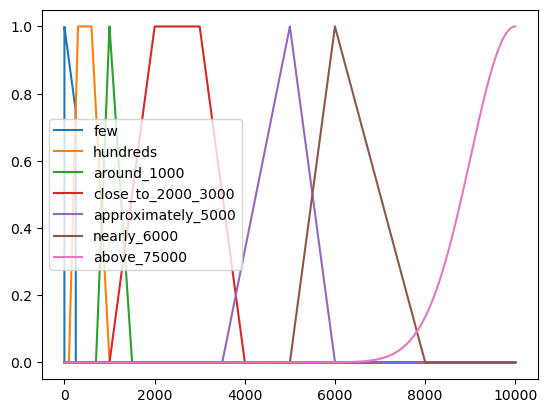

In [63]:
items = np.arange(0,10000)
handles = []

show_plots(items,labels)

## Relative

In [74]:
def almost_none(x):
    # if 0 <= x <= 0.05:
    #     return 1
    # elif 0.05 < x <= 0.15:
    #     return -10 * x + 1.5
    # else:
    #     return 0
    return trapezoidal(0,0,0.05,0.15)(x)

def around_20_percent(x):
    # if 0.1 <= x <= 0.2:
    #     return 10 * x - 1
    # elif 0.2 < x <= 0.3:
    #     return -10 * x + 3
    # else:
    #     return 0
    return triangle(0.1,0.2,0.3)(x)
    

def nearly_one_third(x):
    # if 0.25 <= x <= 0.3:
    #     return 20 * x - 5
    # elif 0.3 < x <= 0.36:
    #     return 1
    # elif 0.36 < x <= 0.41:
    #     return -20 * x + 8.2
    # else:
    #     return 0
    return trapezoidal(0.25,0.3,0.36,0.41)(x)

def approximately_half(x):
    # if 0.4 <= x <= 0.45:
    #     return 20 * x - 8
    # elif 0.45 < x <= 0.55:
    #     return 1
    # elif 0.55 < x <= 0.6:
    #     return -20 * x + 12
    # else:
    #     return 0
    return trapezoidal(0.4,0.45,0.55,0.6)(x)

def most(x):
    # if 0.55 <= x <= 0.7:
    #     return (349/121) * x**2 + (131/20) * x - (179/40)
    # elif 0.75 < x <= 0.8:
    #     return 1
    # else:
    #     return (157/100) * x**2 - (193/20) * x + (202/25)
    return trapezoidal(0.55,0.7,0.75,0.8)(x)

def almost_all(x):
    # if 0.8 <= x <= 0.95:
    #     return (45/128) * x**2 + (43/20) * x - (389/200)
    # elif 0.95 < x <= 1:
    #     return 1
    # else:
    #     return 0
    return trapezoidal(0.8,0.95,1,1)(x)
labels_relative = [almost_none,around_20_percent,nearly_one_third,approximately_half,most,almost_all]

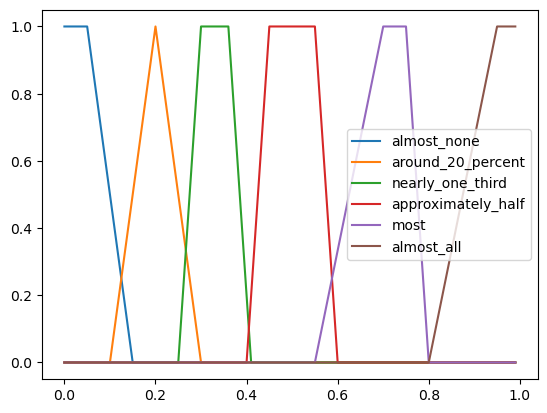

In [75]:
show_plots(np.arange(0,1,0.01),labels_relative)